In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('./Covid_XRAY/metadata.csv')

In [4]:
col = ['survival', 'intubated','intubation_present', 'went_icu', 'in_icu', 
           'needed_supplemental_O2','extubated', 'temperature', 'pO2_saturation', 
           'leukocyte_count','neutrophil_count', 'lymphocyte_count', 'folder', 
           'filename', 'doi', 'url', 'license','clinical_notes', 'other_notes', 'Unnamed: 28']

In [5]:
df = df.drop(labels = col,axis=1)

null_list = list(df['sex'].isnull())
for i,row in df.iterrows():
    if null_list[i] == True:
        df = df.drop(i)
        
df.head()

,patientid,offset,sex,age,finding,view,modality,date,location
0,2,0.0,M,65.0,COVID-19,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
1,2,3.0,M,65.0,COVID-19,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
2,2,5.0,M,65.0,COVID-19,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
3,2,6.0,M,65.0,COVID-19,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam"
4,4,0.0,F,52.0,COVID-19,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 371
Data columns (total 9 columns):
patientid    329 non-null int64
offset       254 non-null float64
sex          329 non-null object
age          315 non-null float64
finding      329 non-null object
view         329 non-null object
modality     329 non-null object
date         253 non-null object
location     246 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 25.7+ KB


In [7]:
df['offset'] = df['offset'].fillna(df['offset'].mean())
df['age'] = df['age'].fillna(df['age'].mean())
df['location'] = df['age'].fillna(np.random.choice(['Vietnam','Taiwan','Canada','China','Australia','Italy']))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 371
Data columns (total 9 columns):
patientid    329 non-null int64
offset       329 non-null float64
sex          329 non-null object
age          329 non-null float64
finding      329 non-null object
view         329 non-null object
modality     329 non-null object
date         253 non-null object
location     329 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 25.7+ KB


### Analysing of Dataset

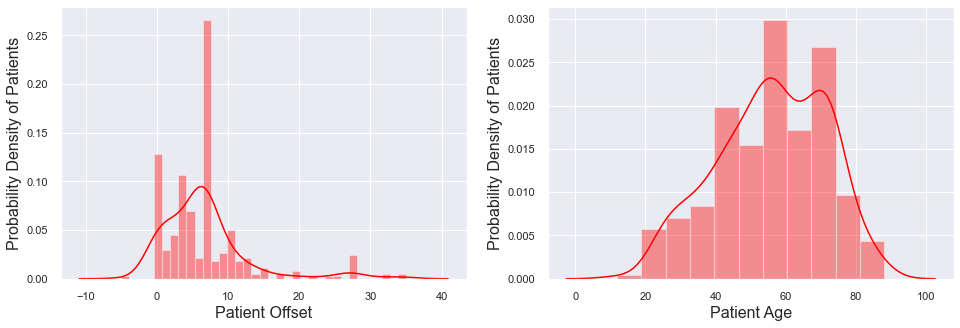

In [37]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

s1 = sns.distplot(df['offset'],color='red',ax=ax[0])
s1.set_xlabel('Patient Offset',fontsize=16)
s1.set_ylabel('Probability Density of Patients',fontsize=16)

s2 = sns.distplot(df['age'],color='red',ax=ax[1])
s2.set_xlabel('Patient Age',fontsize=16)
s2.set_ylabel('Probability Density of Patients',fontsize=16)
plt.show()

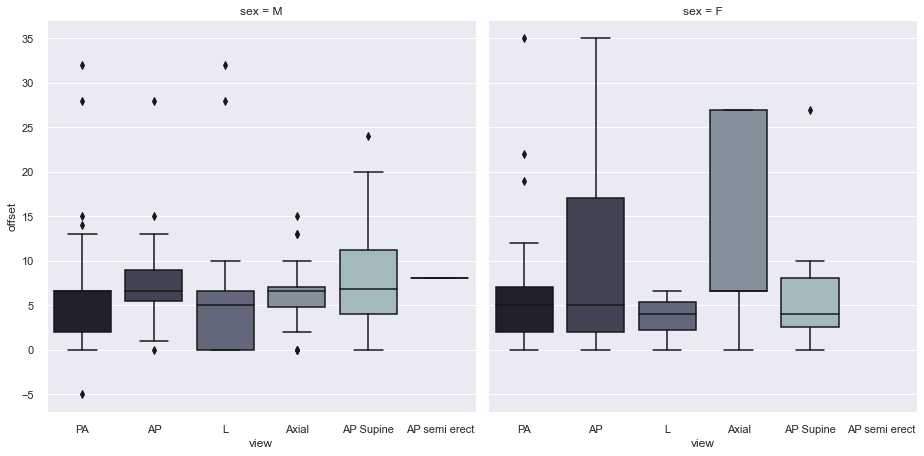

In [33]:
sns.catplot('view','offset',data=df,kind='box',col='sex',col_wrap=2,height=6.5,palette='bone')
plt.show()

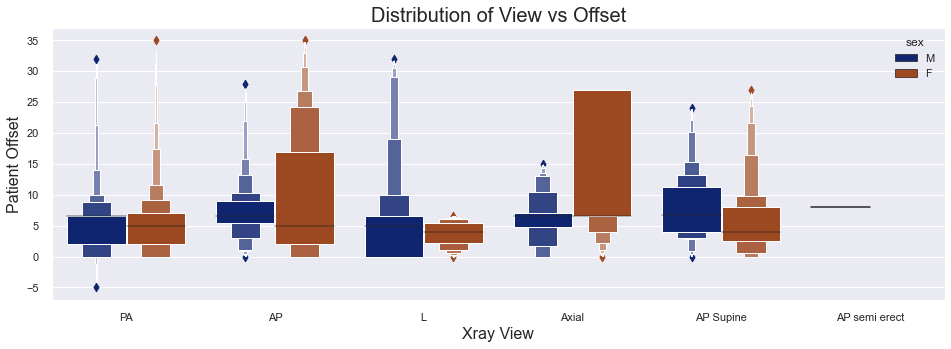

In [44]:
sns.boxenplot('view','offset',data=df,hue='sex',palette='dark')
plt.title('Distribution of View vs Offset',fontsize=20)
plt.xlabel('Xray View',fontsize=16)
plt.ylabel('Patient Offset',fontsize=16)
plt.show()